In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

from PIL import Image
import math


from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Online image


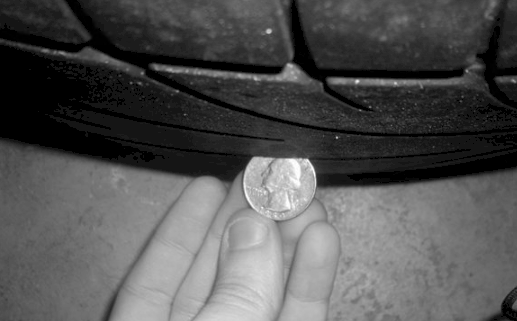

In [ ]:
coin_better = cv2.imread('/content/drive/MyDrive/comp_vision/data/coinbetter.PNG', 0)
cv2_imshow(coin_better)

In [ ]:
print(coin_better.shape)

(321, 517)


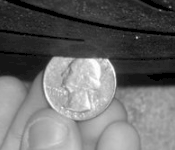

In [ ]:
img_close = coin_better[100:250, 200:375]
cv2_imshow(img_close)

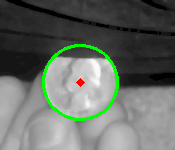

In [ ]:
img = cv2.medianBlur(img_close,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
 param1=200,param2=40,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
 # draw the outer circle
 cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
 # draw the center of the circle
 cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

Equation of the circle: (x - 80)^2 + (y - 82)^2 = 37^2
Diameter of the circle: 74


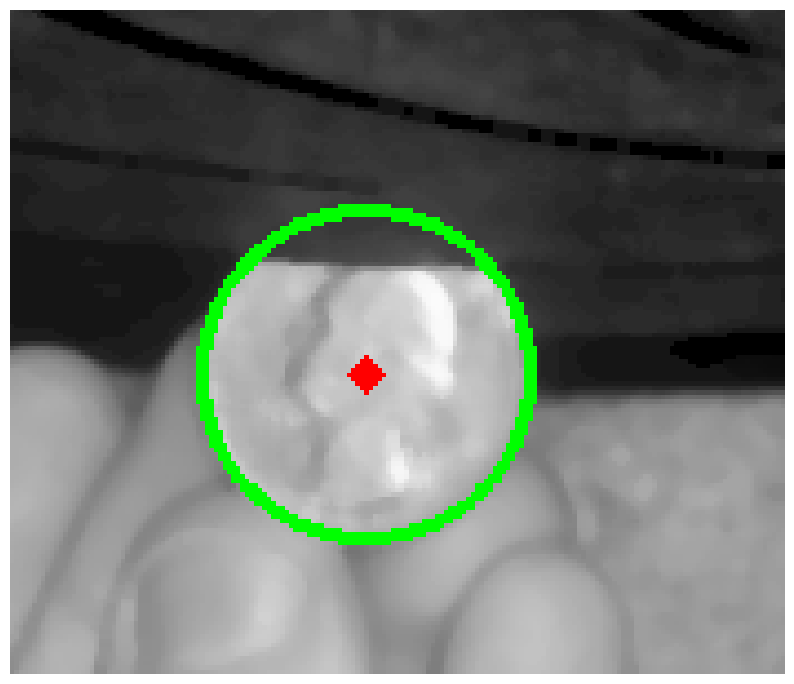

In [ ]:
img = cv2.medianBlur(img_close, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=200,
    param2=40,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

The coin is 74 pixels in diamater. This can be convereted to mm, which is the type of measurement that is needed for tire tred depth. The coin used in the image is an american quater, which is 24.26mm. Hence a conversion factor can be calculated and used to find the

In [ ]:
conversion_factor = 24.26 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.328 mm/pixel
Diameter of the circle in real-world units: 24.26 mm


Hence, the diameter of the circle is equal to the diameter of the coin, which means the hough circle is a correct size compared to the coin

Average distance from the circle's edge to the detected edges: 12.32 pixels
Tread depth: 4.04 mm


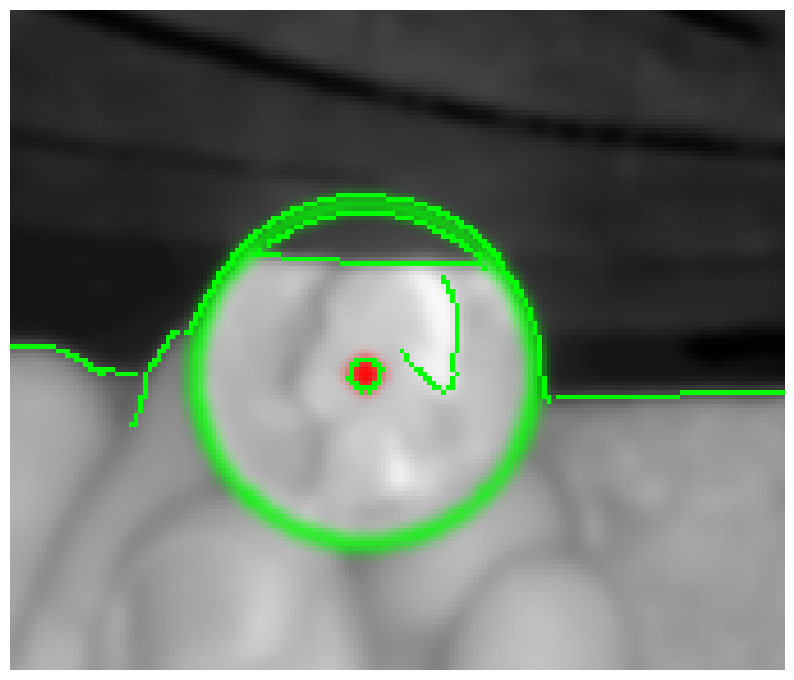

In [ ]:
#th1=50
#th2=150 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
#d=3 # gaussian blur

#edgeresult=cimg.copy()
#edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

#gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

#edge = cv2.Canny(gray, th1, th2)

#edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

#plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

# Apply Gaussian blur and Canny edge detector
th1 = 50
th2 = 150
d = 3
edgeresult = cimg.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d, d:-d]
gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, th1, th2)
edgeresult[edge != 0] = (0, 255, 0)

if circles is not None:
    edge_points = np.column_stack(np.where(edge != 0))
    distances = []
    for point in edge_points:
        distance = abs(np.sqrt((point[1] - circle_center[0])**2 + (point[0] - circle_center[1])**2) - circle_radius)
        distances.append(distance)

    # Calculate the average distance
    average_distance = np.mean(distances)
    print(f"Average distance from the circle's edge to the detected edges: {average_distance:.2f} pixels")

    # If you have a conversion factor, convert the distance to real-world units
    # Example: If the conversion factor is 0.338 mm/pixel (you need to calculate this based on your coin's known diameter)
    conversion_factor = 0.328
    tread_depth = average_distance * conversion_factor
    print(f"Tread depth: {tread_depth:.2f} mm")

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

taking the distance of the coin by measuring using a ruler can find the accuracy of the output.

# Personal images

## Street tyre tread (9mm)

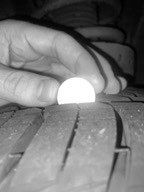

In [ ]:
img_four = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/IMG_4.jpg', 0) # Importing image in greyscale
cv2_imshow(img_four) # Printing image to check whether it is addressed correctly

Equation of the circle: (x - 76)^2 + (y - 96)^2 = 19^2
Diameter of the circle: 38


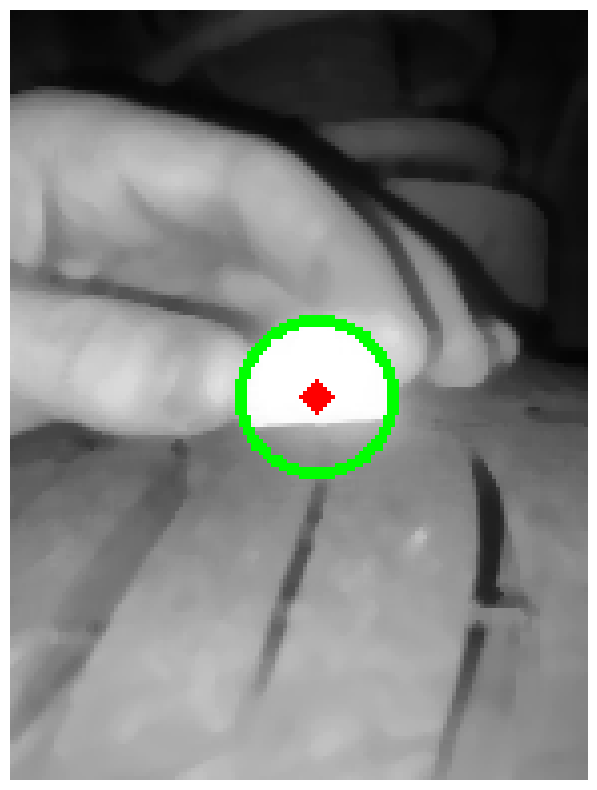

In [ ]:
img = cv2.medianBlur(img_four, 5)             # Apply a median blur to the image to reduce noise
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) # Convert the greyscale image to a BGR image (3 channels)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,                        # Input grey scale image
    cv2.HOUGH_GRADIENT,         # Method for detecting circles
    dp=1,                       # Inverse ratio of the accumulator resolution to the image resolution
    minDist=30,                 # Minimum distance between centres of circles (only one circle, hence made redundant)
    param1=100,                 # Threshold for canny edge detector (looks for rapid changes in intensity)
    param2=35,                  # minimum value required for a point to be considered a valid circle center
    minRadius=0,                # minimum radius of circles to be detected
    maxRadius=0                 # maximum radius of circles to be detected (setting to 0 means there is no upper limit)
)

if circles is not None: # if circles were detected
    circles = np.uint16(np.around(circles)) # Round circle parameters and convert to intergers
    for i in circles[0, :]:
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2) # Draw the circle on cimg (BGR)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3) # Draw the center on cimg (BGR)
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")                    # extract necessary circle parameters to formulate equation
        diameter = 2 * i[2] # Calculate and print the diameter
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1]) # Extract centre
        circle_radius = i[2] # Extract radius

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show() # Display the result

In [ ]:
conversion_factor = 23.6 / diameter # diamater of 10C coin is 23.6 mm
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")                 # Each pixel represents 0.621 mm
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor # Multiplying diameter by conversion factor to get diameter of Hough circle
print(f"Diameter of the circle in real-world units: {diameter_mm:.2f} mm") # Print

Conversion factor: 0.621 mm/pixel
Diameter of the circle in real-world units: 23.60 mm


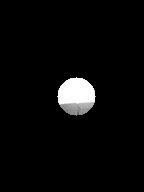

In [ ]:
# Create a mask with the same dimensions as the input image, initialized to zeros
mask = np.zeros(img_four.shape[:2], dtype="uint8")
# Draw a filled white circle on the mask
# The circle is centered at (76, 96) with a radius 19 pixels
# The color 255 means white (in a grayscale image), and -1 means the circle is filled
cv2.circle(mask, (76, 96), 19, 255, -1)
# Apply the mask to the input image using bitwise AND operation
# This keeps the pixel values where the mask is 255, and sets the rest to 0
masked = cv2.bitwise_and(img_four, img_four, mask=mask)
#Display
cv2_imshow(masked)

In [ ]:
#Extracts pixels that are non zero (anything other than black)
number_of_pix = cv2.countNonZero(masked)
# Hence, we print the area of the circle in pixels
print('Number of pixels in circle:', number_of_pix)
#thresholding to extract pixels with high intensity (close to white)
number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)
#Extract grey pixels, representing the portion of the circle covered by the tire
segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)

Number of pixels in circle: 1129
Number of white pixels: 789
Number of segmented pixels: 340


In [ ]:
from scipy.optimize import fsolve  # Import the fsolve function from scipy.optimize for solving equations

# Define a function to calculate the difference between the segment area formula and the actual area
def segment_area(theta, r, A):
    # Calculate the segment area using the formula and subtract the given area A
    return (r**2 / 2) * (theta - np.sin(theta)) - A

# Define a function to find the angle theta that corresponds to the given segment area
def find_theta(r, A):
    # Initial guess for theta using an approximate formula for small angles
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    # Use fsolve to find the value of theta that solves the segment_area equation
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]  # Return the first (and only) element of the solution array

# Define a function to find the height of the segment given the radius and the area of the segment
def find_segment_height(r, A):
    theta = find_theta(r, A)  # Find the angle theta for the given segment area
    h = r * (1 - np.cos(theta / 2))  # Calculate the height of the segment using the formula
    return h  # Return the calculated height

# Example values
r = circle_radius  # Radius of the circle
A = segmented_area_pix  # Area of the segment in pixels

# Calculate the estimated height of the segment
estimate_height = find_segment_height(r, A)
# Convert the estimated height from pixels to millimeters using the conversion factor
estimate_height = conversion_factor * estimate_height
# Print the height of the segment in millimeters
print(f"The height of the segment is: {estimate_height:.2f} mm")

The height of the segment is: 8.02 mm


In [ ]:
actual_height = 9
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: -10.85 %


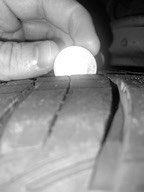

In [ ]:
Street_3 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Street_3.jpg', 0)
cv2_imshow(Street_3)


Equation of the circle: (x - 74)^2 + (y - 66)^2 = 22^2
Diameter of the circle: 44


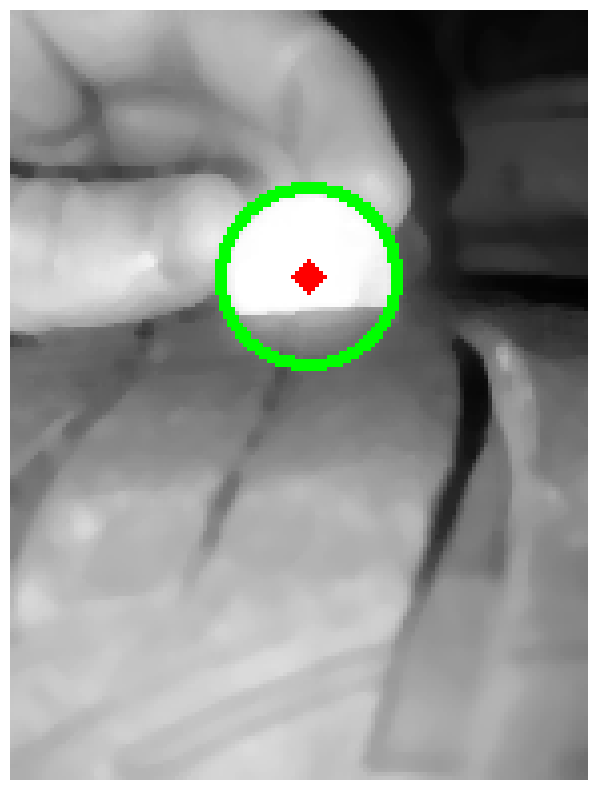

In [ ]:
img = cv2.medianBlur(Street_3, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=100,
    param2=35,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.536 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


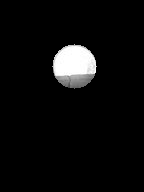

In [ ]:
mask = np.zeros(Street_3.shape[:2], dtype="uint8")
cv2.circle(mask, (74, 66), 22, 255, -1)
masked = cv2.bitwise_and(Street_3, Street_3, mask=mask)
cv2_imshow(masked)



In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 1517
Number of white pixels: 955
Number of segmented pixels: 562


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 22  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")


The height of the segment is: 9.37 mm


In [ ]:
actual_height = 9
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: 4.06 %


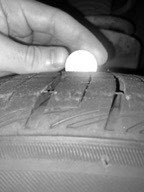

In [ ]:
Street_4 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Street_4.jpg', 0)
cv2_imshow(Street_4)


Equation of the circle: (x - 80)^2 + (y - 64)^2 = 15^2
Diameter of the circle: 30


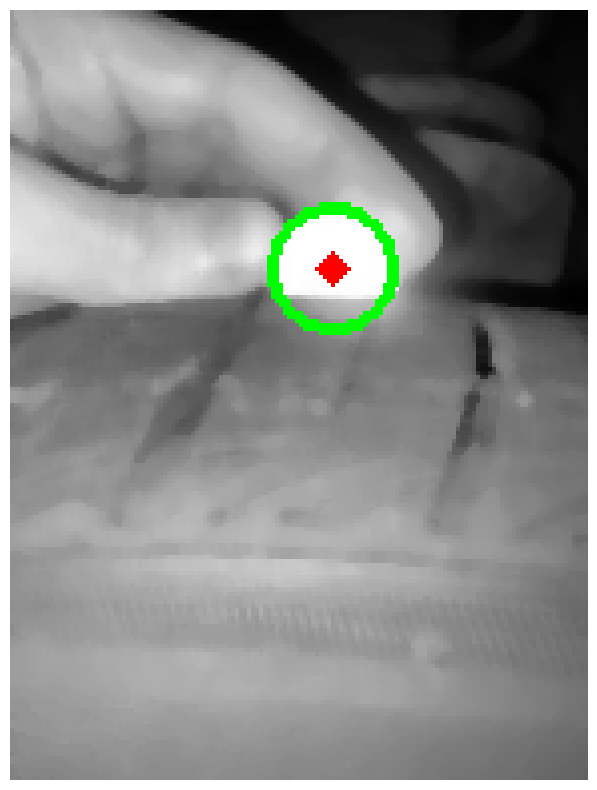

In [ ]:
img = cv2.medianBlur(Street_4, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=92,
    param2=32,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.787 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


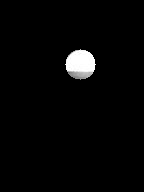

In [ ]:
mask = np.zeros(Street_4.shape[:2], dtype="uint8")
cv2.circle(mask, (80, 64), 15, 255, -1)
masked = cv2.bitwise_and(Street_4, Street_4, mask=mask)
cv2_imshow(masked)


In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)



Number of pixels in circle: 709
Number of white pixels: 522
Number of segmented pixels: 187


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 16  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")


The height of the segment is: 7.12 mm


In [ ]:
actual_height = 9
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: -20.88 %


## Semi Slick tire compound (5mm)

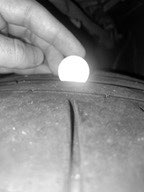

In [ ]:
Slick_1 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Slick_1.jpg', 0)
cv2_imshow(Slick_1)

Equation of the circle: (x - 72)^2 + (y - 72)^2 = 16^2
Diameter of the circle: 32


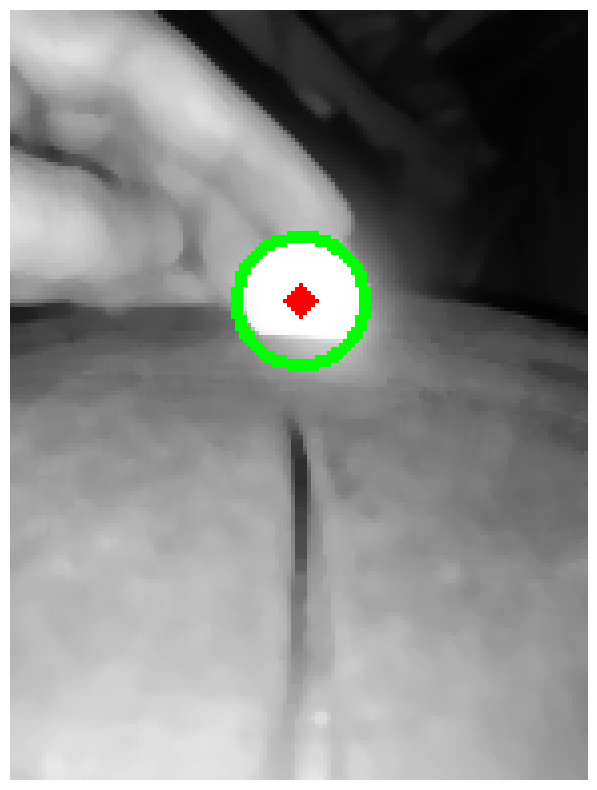

In [ ]:
img = cv2.medianBlur(Slick_1, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=92,
    param2=30,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.694 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


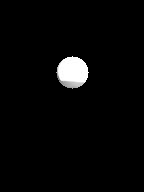

In [ ]:
mask = np.zeros(Slick_1.shape[:2], dtype="uint8")
cv2.circle(mask, (72, 72), 16, 255, -1)
masked = cv2.bitwise_and(Slick_1, Slick_1, mask=mask)
cv2_imshow(masked)

In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 797
Number of white pixels: 631
Number of segmented pixels: 166


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 16  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")

The height of the segment is: 5.77 mm


In [ ]:
actual_height = 5
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: 15.42 %


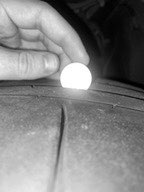

In [ ]:
Slick_2 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Slick_2.jpg', 0)
cv2_imshow(Slick_2)


Equation of the circle: (x - 74)^2 + (y - 78)^2 = 16^2
Diameter of the circle: 32


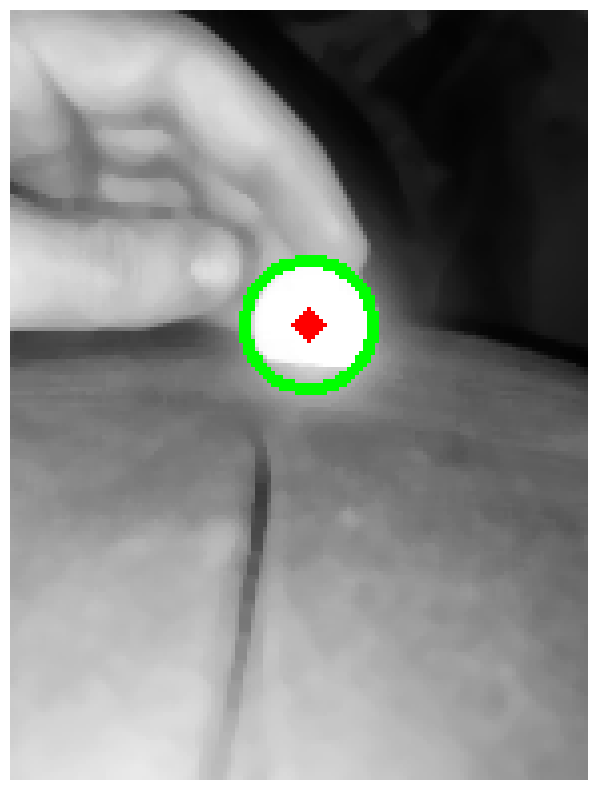

In [ ]:
img = cv2.medianBlur(Slick_2, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=92,
    param2=35,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")


Conversion factor: 0.738 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


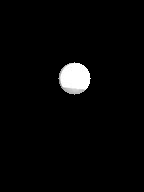

In [ ]:
mask = np.zeros(Slick_2.shape[:2], dtype="uint8")
cv2.circle(mask, (74, 78), 16, 255, -1)
masked = cv2.bitwise_and(Slick_2, Slick_2, mask=mask)
cv2_imshow(masked)


In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 797
Number of white pixels: 633
Number of segmented pixels: 164


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 16  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")

The height of the segment is: 6.08 mm


In [ ]:
actual_height = 5
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: 21.58 %


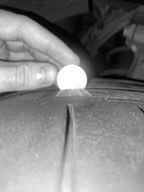

In [ ]:
Slick_3 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Slick_3.jpg', 0)
cv2_imshow(Slick_3)


Equation of the circle: (x - 72)^2 + (y - 78)^2 = 15^2
Diameter of the circle: 30


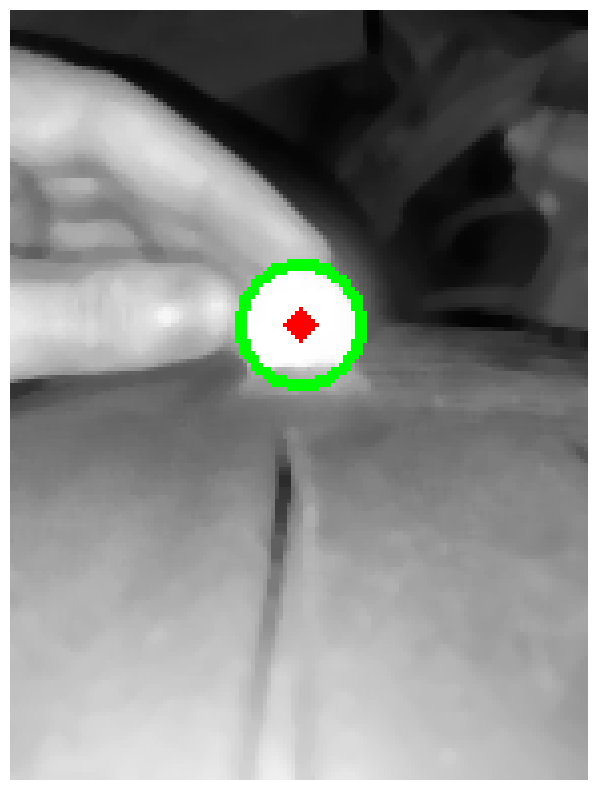

In [ ]:
img = cv2.medianBlur(Slick_3, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=92,
    param2=30,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.787 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


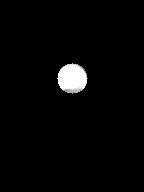

In [ ]:
mask = np.zeros(Slick_3.shape[:2], dtype="uint8")
cv2.circle(mask, (72, 78), 15, 255, -1)
masked = cv2.bitwise_and(Slick_3, Slick_3, mask=mask)
cv2_imshow(masked)


In [ ]:

number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 709
Number of white pixels: 576
Number of segmented pixels: 133


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 16  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")


The height of the segment is: 5.59 mm


In [ ]:
actual_height = 5
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: 11.84 %


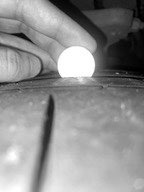

In [ ]:
Slick_4 = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/Slick_4.jpg', 0)
cv2_imshow(Slick_4)


Equation of the circle: (x - 76)^2 + (y - 64)^2 = 19^2
Diameter of the circle: 38


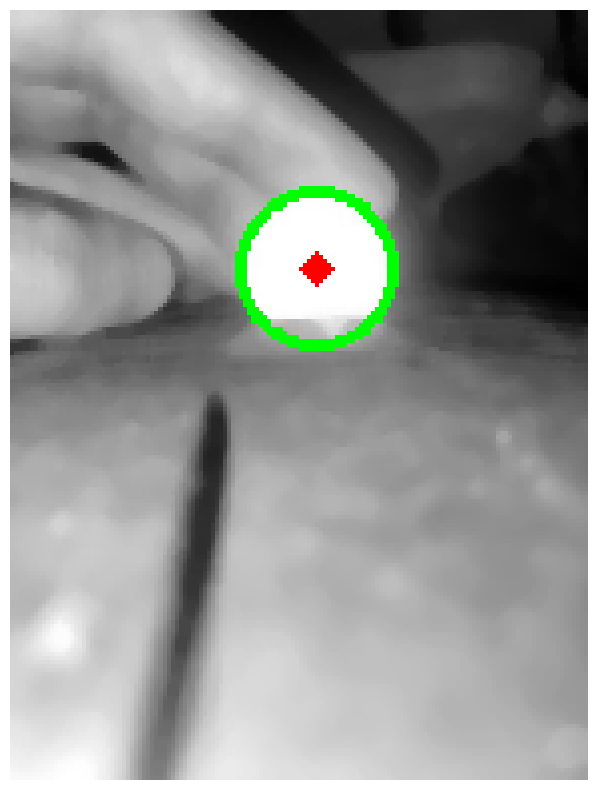

In [ ]:
img = cv2.medianBlur(Slick_4, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=92,
    param2=30,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")


Conversion factor: 0.621 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


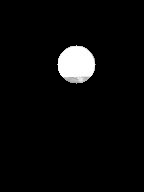

In [ ]:

mask = np.zeros(Slick_4.shape[:2], dtype="uint8")
cv2.circle(mask, (76, 64), 19, 255, -1)
masked = cv2.bitwise_and(Slick_4, Slick_4, mask=mask)
cv2_imshow(masked)


In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 1129
Number of white pixels: 937
Number of segmented pixels: 192


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 16  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")


The height of the segment is: 5.73 mm


In [ ]:
actual_height = 5
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: 14.59 %


# Worn street tyre (3mm)

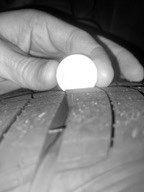

In [ ]:
img_six = cv2.imread('/content/drive/MyDrive/comp_vision/data_project/IMG_6.jpg', 0)
cv2_imshow(img_six)

Equation of the circle: (x - 76)^2 + (y - 74)^2 = 19^2
Diameter of the circle: 38


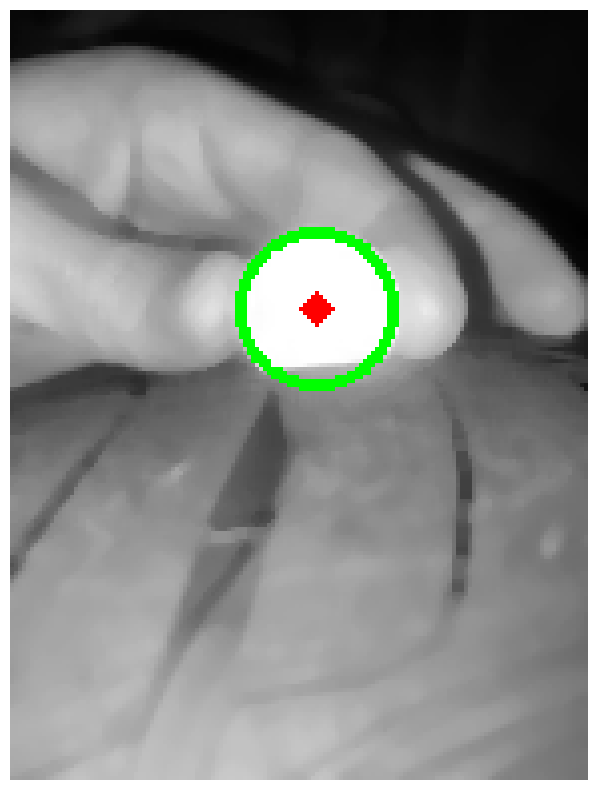

In [ ]:
img = cv2.medianBlur(img_six, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=30,
    param1=100,
    param2=40,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Print the equation of the circle
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        # Calculate and print the diameter
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the hough circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.621 mm/pixel
Diameter of the hough circle in real-world units: 23.60 mm


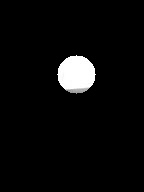

In [ ]:
mask = np.zeros(img_six.shape[:2], dtype="uint8")
cv2.circle(mask, (76, 74), 19, 255, -1)
masked = cv2.bitwise_and(img_six, img_six, mask=mask)
cv2_imshow(masked)


In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)


Number of pixels in circle: 1129
Number of white pixels: 1039
Number of segmented pixels: 90


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 18  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")

The height of the segment is: 3.21 mm


In [ ]:
actual_height = 4
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: -19.66 %


# example

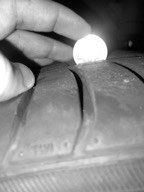

In [ ]:
img_one = cv2.imread('/content/drive/MyDrive/comp_vision/data/IMG_1.jpg', 0)
cv2_imshow(img_one)

Equation of the circle: (x - 88)^2 + (y - 52)^2 = 18^2
Diameter of the circle: 36


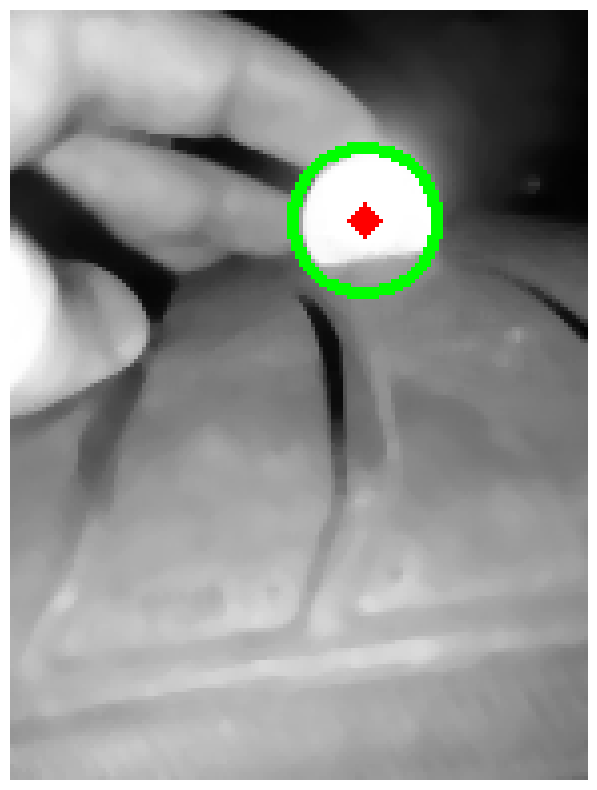

In [ ]:
img = cv2.medianBlur(img_one, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=60,
    param1=100,
    param2=35,
    minRadius=0,
    maxRadius=0
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        print(f"Equation of the circle: (x - {i[0]})^2 + (y - {i[1]})^2 = {i[2]}^2")
        diameter = 2 * i[2]
        print(f"Diameter of the circle: {diameter}")
        circle_center = (i[0], i[1])
        circle_radius = i[2]

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show() # Display the result

In [ ]:
conversion_factor = 23.6 / diameter
print(f"Conversion factor: {conversion_factor:.3f} mm/pixel")
# Calculate and print the diameter in real-world units
diameter_mm = diameter * conversion_factor
print(f"Diameter of the circle in real-world units: {diameter_mm:.2f} mm")

Conversion factor: 0.656 mm/pixel
Diameter of the circle in real-world units: 23.60 mm


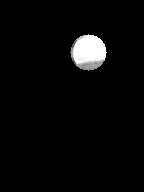

In [ ]:
mask = np.zeros(img_one.shape[:2], dtype="uint8")
cv2.circle(mask, (88, 52), 18, 255, -1)
masked = cv2.bitwise_and(img_one, img_one, mask=mask)

cv2_imshow(masked)

In [ ]:
number_of_pix = cv2.countNonZero(masked)
print('Number of pixels in circle:', number_of_pix) #prints the area of the circle

number_of_white_pix = np.sum(masked >= 235)
print('Number of white pixels:', number_of_white_pix)

segmented_area_pix = number_of_pix - number_of_white_pix
print('Number of segmented pixels:', segmented_area_pix)

Number of pixels in circle: 1009
Number of white pixels: 709
Number of segmented pixels: 300


In [ ]:
from scipy.optimize import fsolve

def segment_area(theta, r, A):
    return (r**2 / 2) * (theta - np.sin(theta)) - A

def find_theta(r, A):
    # Initial guess for theta
    theta_initial_guess = 2 * np.arccos(1 - A / (r**2))
    theta_solution = fsolve(segment_area, theta_initial_guess, args=(r, A))
    return theta_solution[0]

def find_segment_height(r, A):
    theta = find_theta(r, A)
    h = r * (1 - np.cos(theta / 2))
    return h

# Example values
r = 18  # Radius of the circle
A = segmented_area_pix  # Area of the segment

estimate_height = find_segment_height(r, A)
estimate_height = conversion_factor * estimate_height
print(f"The height of the segment is: {estimate_height:.2f} mm")

The height of the segment is: 7.92 mm


In [ ]:
actual_height = 8.7
percentage_error = ((estimate_height - actual_height)/actual_height)*100
print(f"percentage error between estimate and actual: {percentage_error:.2f} %")

percentage error between estimate and actual: -8.91 %
